In [1]:
import tensorflow as tf
import sys
#sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
#import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import os
import re
#import nibabel as nib
import sklearn as skl
#import pandas as pd

#pd.options.display.max_colwidth = 100
#pd.options.display.max_columns = 10000

In [2]:
def Dice(pred,true,labels=[0,1,2,3]):
    l = len(labels)
    ret = np.zeros(l)
    for i in range(l):
        lab = labels[i]
        p = pred==lab
        t = true==lab
        ret[i] = 2*float(np.logical_and(p,t).sum())/(p.sum()+t.sum())
    return ret

In [3]:
def load_sitk(sitk_path):
    return sitk.GetArrayFromImage(sitk.ReadImage(sitk_path))

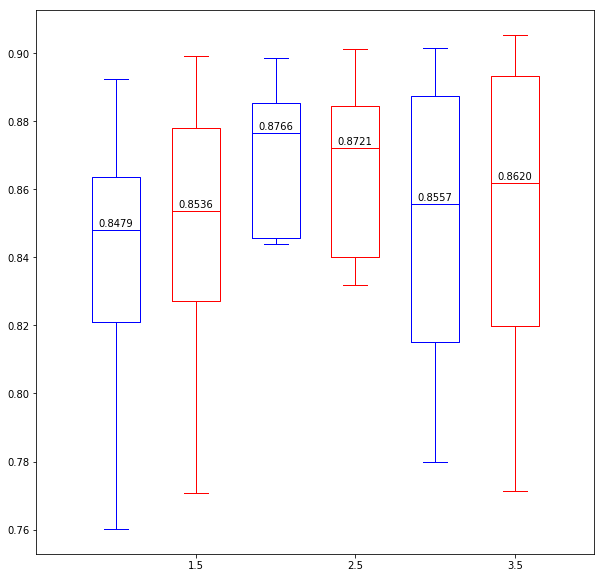

In [84]:
data_dir = '/proj/NIRAL/users/siyangj/NewModels/model_0227_unet/models/1/patch_pretrain1'
true_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
cr_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

Dice_all = []
Dice_mask = []

for i in range(1,9):
    im_pred = load_sitk(os.path.join(data_dir, 'prediction-%d.nrrd'%i))
    im_true = load_sitk(os.path.join(true_dir, '%d.nrrd'%i))
    im_mask = load_sitk(os.path.join(cr_dir, '%d.nrrd'%i))
    
    Dice_all += [Dice(im_pred,im_true),]
    im_pred[im_mask==1] = 0
    im_true[im_mask==1] = 0
    Dice_mask += [Dice(im_pred,im_true),]

Dice_all = np.array(Dice_all)
Dice_mask = np.array(Dice_mask)

plt.figure(figsize=(10,10))
box1 = plt.boxplot(Dice_all[:,1:],positions=[1,2,3])
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color='blue')
box2 = plt.boxplot(Dice_mask[:,1:],positions=[1.5,2.5,3.5])
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box2[item], color='red')
plt.xlim(0.5,4)

for line in box1['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    v = line.get_data()[1][1] 
    # overlay median value
    plt.text(x-0.15, y+0.001, '%.4f' % v,
         horizontalalignment='center') # draw above, centered
    
for line in box2['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    v = line.get_data()[1][1] 
    # overlay median value
    plt.text(x-0.15, y+0.001, '%.4f' % v,
         horizontalalignment='center') # draw above, centered

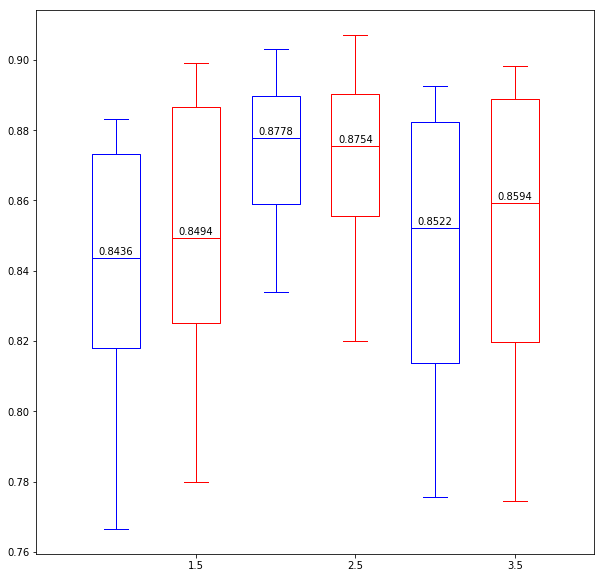

In [83]:
data_dir = '/proj/NIRAL/users/siyangj/NewModels/model_0228_unet_early/models/1/patch_pretrain1/'
true_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
cr_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

Dice_all = []
Dice_mask = []

for i in range(1,9):
    im_pred = load_sitk(os.path.join(data_dir, 'prediction-%d.nrrd'%i))
    im_true = load_sitk(os.path.join(true_dir, '%d.nrrd'%i))
    im_mask = load_sitk(os.path.join(cr_dir, '%d.nrrd'%i))
    
    Dice_all += [Dice(im_pred,im_true),]
    im_pred[im_mask==1] = 0
    im_true[im_mask==1] = 0
    Dice_mask += [Dice(im_pred,im_true),]

Dice_all = np.array(Dice_all)
Dice_mask = np.array(Dice_mask)

plt.figure(figsize=(10,10))
box1 = plt.boxplot(Dice_all[:,1:],positions=[1,2,3])
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color='blue')
box2 = plt.boxplot(Dice_mask[:,1:],positions=[1.5,2.5,3.5])
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box2[item], color='red')
plt.xlim(0.5,4)

for line in box1['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    v = line.get_data()[1][1] 
    # overlay median value
    plt.text(x-0.15, y+0.001, '%.4f' % v,
         horizontalalignment='center') # draw above, centered
    
for line in box2['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    v = line.get_data()[1][1] 
    # overlay median value
    plt.text(x-0.15, y+0.001, '%.4f' % v,
         horizontalalignment='center') # draw above, centered

In [72]:
line.get_data()

(array([2.85, 3.15]), array([0.85215868, 0.85215868]))

In [4]:
def ShowDice(pred_path,true_path,cr_path=None):
    pred = load_sitk(pred_path)
    true = load_sitk(true_path)
    print(Dice(pred,true))
    if cr_path is not None:
        cr_mask = load_sitk(cr_path)
        pred[cr_mask==1] = 0
        true[cr_mask==1] = 0
        print(Dice(pred,true))

In [7]:
def ShowDiceDir(pred_dir,true_dir,im_num=1,cr_mask=True,phase=1):
    ShowDice(os.path.join(pred_dir,('prediction-%d.nrrd'if phase==1 else 'prediction-2-%d.nrrd')%im_num),
             os.path.join(true_dir,'%d.nrrd'%im_num),
            ('/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/%d.nrrd'%im_num) if cr_mask else None)

In [6]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0307_architecture_search/models/1/32real/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.99181732 0.80702226 0.81557006 0.80506268]
[0.99399111 0.82549374 0.81865764 0.81500557]


In [9]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0307_architecture_search/models/1/48real/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.9949036  0.84058714 0.84830454 0.83632703]
[0.99644358 0.85311612 0.84528585 0.8453317 ]


In [6]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0307_architecture_search/models/1/80real/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.99416496 0.84269006 0.85152221 0.84112628]
[0.99590687 0.85413464 0.84875171 0.85116572]


In [9]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0228_unet_early/models/1/patch_pretrain1/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.9940521  0.80306931 0.84025485 0.83015227]
[0.99582584 0.81808179 0.84018802 0.84037788]


In [7]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0228_unet_early/models/1/patch_real_noaug1/inf_real/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.99467305 0.84294256 0.85346965 0.84229262]
[0.99624584 0.85575369 0.85138184 0.85165244]


In [8]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0228_unet_early/models/2/patch_real1/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True,2)

[0.99457762 0.84519755 0.85571531 0.84343307]
[0.9962189  0.85812679 0.85443005 0.85363797]


In [7]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0228_unet_early/models/1/whole_pretrain1/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.99323584 0.80517471 0.84568442 0.83480879]
[0.99512021 0.8183951  0.84467006 0.84448828]


In [8]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0227_unet/models/1/whole_pretrain1/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.9923143  0.80548467 0.83887296 0.82324576]
[0.99429736 0.81819518 0.83724616 0.83142247]


In [7]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0227_unet/models/1/patch_pretrain1/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.99416732 0.81037851 0.84462799 0.82775788]
[0.99589083 0.82297521 0.8419843  0.83692241]


In [8]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0228_unet_early/models/1/patch_pretrain1/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.9940521  0.80306705 0.84025264 0.83015227]
[0.99582584 0.81807939 0.84018547 0.84037788]


In [9]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0218_patch/models/1/pretrain1/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,8,True)

[0.99974575 0.81720621 0.85636761 0.87678938]
[0.99976414 0.83341774 0.85647505 0.8830192 ]


In [10]:
ShowDiceDir(inf_path,data_path,1,True)

[0.99487252 0.79183102 0.8409444  0.84036079]
[0.99638876 0.8045053  0.83588579 0.84807513]


In [12]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0220_no_pretraining/patch_1_save/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.99502344 0.82102482 0.83800684 0.83883334]
[0.99654528 0.83226682 0.83301685 0.84798649]


In [18]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0220_no_pretraining/patch_1_save/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,8,True)

[0.99984727 0.88502894 0.88169458 0.86660041]
[0.99986161 0.89612221 0.8827334  0.87244933]


In [15]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0220_no_pretraining/whole_1_save/'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_path,data_path,1,True)

[0.99507896 0.78901059 0.81862302 0.82556169]
[0.99657835 0.79965727 0.81221051 0.83509992]


In [9]:
data_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_dir  = '/proj/NIRAL/users/siyangj/NewModels/model_0218_patch/models/1/pretrain1/'
cr_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_dir,data_dir,1,True)

[0.99487252 0.79183102 0.8409444  0.84036079]
[0.99638876 0.8045053  0.83588579 0.84807513]


In [10]:
ShowDiceDir(inf_dir,data_dir,8,True)

[0.99974575 0.81720621 0.85636761 0.87678938]
[0.99976414 0.83341774 0.85647505 0.8830192 ]


In [30]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/8.nrrd'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0218_patch/models/1/real1/prediction-8.nrrd'
cr_path = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/1.nrrd'

In [16]:
data_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'
inf_dir  = '/proj/NIRAL/users/siyangj/NewModels/model_0218_patch/models/1/real1/'
cr_dir = '/proj/NIRAL/users/siyangj/myData/min_normal/CerebellumMask/'

ShowDiceDir(inf_dir,data_dir,1,True)

[0.9950454  0.82561722 0.83896731 0.84048327]
[0.99654515 0.83547703 0.83292141 0.84999759]


In [33]:
ShowDiceDir(inf_dir,data_dir,1,True)

[0.9950454  0.82561722 0.83896731 0.84048327]
[0.99654515 0.83547703 0.83292141 0.84999759]


In [17]:
ShowDiceDir(inf_dir,data_dir,8,True)

[0.99981756 0.88386362 0.87342285 0.85878282]
[0.99983253 0.89558643 0.87505924 0.8646236 ]


In [19]:
## Data augmentation on 1
## inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0218_patch/models/1/real1/prediction-1.nrrd'
## array([0.9950454 , 0.82561722, 0.83896731, 0.84048327])

## Data augmentation on 8
## inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0218_patch/models/1/real1/prediction-8.nrrd'
## array([0.99981756, 0.88386362, 0.87342285, 0.85878282])
Dice(inf,seg)

array([0.99981756, 0.88386362, 0.87342285, 0.85878282])

In [10]:
## Data augmentation on 1
##inf_path  = '/proj/NIRAL/users/siyangj/myData/min_normal/stage2/prediction-2-1.nrrd'
## array([0.99493095, 0.82080061, 0.82948852, 0.83784337])

## Data augmentation on 8
##inf_path  = '/proj/NIRAL/users/siyangj/myData/min_normal/stage2/prediction-2-8.nrrd'
##array([0.99984149, 0.88862115, 0.88321894, 0.86640754])
Dice(inf,seg)

array([0.99493095, 0.82080061, 0.82948852, 0.83784337])

In [42]:
## Data augmentation on 1
##inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0217_data_aug/models/1/data_aug_2_validate_on_1/prediction-1.nrrd'
## array([0.99507099, 0.81366027, 0.83624629, 0.84060861])

## Data augmentation on 8
##inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0217_data_aug/models/1/data_aug_2_validate_on_1/prediction-8.nrrd'
##array([0.99985222, 0.87666222, 0.86911162, 0.86009736])
Dice(inf,seg)

array([0.99985222, 0.87666222, 0.86911162, 0.86009736])

In [1]:
data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/8.nrrd'
inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0215_class_weight/models/1/provide_weights_real_validate_on_1/prediction-8.nrrd'

In [35]:
seg = sitk.GetArrayFromImage(sitk.ReadImage(data_path))
inf = sitk.GetArrayFromImage(sitk.ReadImage(inf_path))


In [36]:
## No data augmentation on 1
## inf_path  = '/proj/NIRAL/users/siyangj/NewModels/model_0215_class_weight/models/1/provide_weights_real_validate_on_1/prediction-1.nrrd'
## array([0.99511906, 0.79120141, 0.82832828, 0.83931543])
Dice(inf,seg)

array([0.99511906, 0.79120141, 0.82832828, 0.83931543])